In [6]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
def deriv(y, t, N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1):
    S, E, C, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * epsilon * E - phi * (1 - epsilon) * E
    dCdt = phi * (1 - epsilon) * E - lambda1 * C 
    dIdt = delta * epsilon * E - (1-alpha) * gamma * I - rho * alpha * I
    dRdt =lambda1 * C + (1-alpha) * gamma * I          
    dDdt = rho * alpha * I
    return dSdt, dEdt, dCdt, dIdt, dRdt, dDdt

In [8]:

N = 10000000
D = 25.0                       #infections lasts days
gamma = 1.0 / D
delta = 1                      # incubation period 
epsilon = 0.90                 # being a symptomatic and (1-epsilon) asymptomatic
R_0 = 10.0   
beta = R_0 * gamma        # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.033             # death rate
rho = 1/30                # 30 days from infection until death
phi = 1.0 / 7.0           # 5 days approx carrier period before recovery
lambda1 = 1.0 / 7.0       # 7 days infection period
S0, E0, C0, I0, R0, D0 = N-31-10000-1000, 10000, 1000, 31, 0, 0    # initial conditions of 3 march.

In [9]:

t = np.linspace(0, 15, 15)     # Grid of time points (in days)
y0 = S0, E0, C0, I0, R0, D0      # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1))
S, E, C, I, R, D = ret.T
print(D)

[   0.            4.31318446   14.25784408   28.60973509   47.98180228
   73.79253991  108.08593431  153.61316761  214.02547176  294.14860538
  400.34448198  540.9769137   727.00248855  972.70703202 1296.60164581]


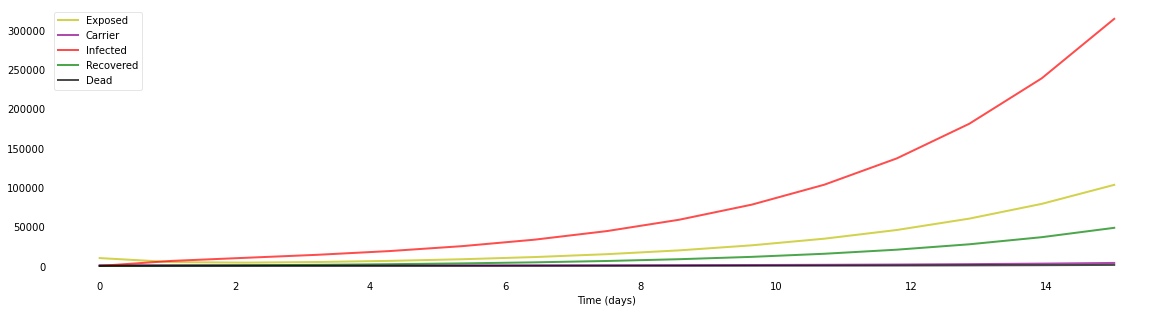

In [10]:
f, ax = plt.subplots(1,1,figsize=(20,5))
# ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, C, 'darkmagenta', alpha=0.7, linewidth=2, label='Carrier')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
# ax.plot(t, S+E+C+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

ax.set_xlabel('Time (days)')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();